MonteCarlo simulation

In [1]:
using LinearAlgebra
#using Plots
using SparseArrays
using Pkg
using Arpack
using PyPlot
using Random
using Statistics

In [88]:

function f(x)
    y = sqrt.(1 .- x.^2 )
    return y
end
N = 100000
function state(N)
    xi = 0
    xf = 1
    x = LinRange(xi,xf,10000)
    yyy = LinRange(0,1,10000)
    y = f(x)
    b = minimum(y)
    h = maximum(y)
    List = []

    for i in 1:N
        xx = x[rand(1:length(x))]
        yy = yyy[rand(1:length(yyy))]

        if (xi < xx <xf) & (0 < yy < f(xx))
            push!(List, 1)
        elseif (xi < xx <xf) & (f(xx) < yy < 0 )
            push!(List, -1)
        else
            push!(List, 0)
        end
    end


    Nc = sum(List)
    Nl = length(List)
    p = Nc/Nl
    a = (xf - xi)*(h-b)


    A = p*a
    return A
end



0.783

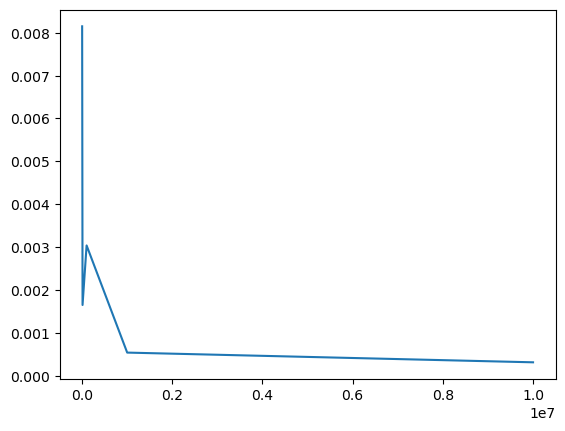

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000076983A0>

In [137]:
trueval = pi/4
Npow = [10^i for i in 3:7]
Err = []
for i in Npow
    mybal = state(i)
    err = abs(mybal - trueval)/trueval
    push!(Err, err)
end

PyPlot.plot(Npow, Err)
    

2.244578249549503

In [112]:
N = 10000
S = []
for i in 1:N
    si = rand(1)[1]
    push!(S,si)
end

Sm = mean(S)
sd = std(S)

print("mean of S is ", Sm)
print(" 
    ")
print("standard deviation of S is ", sd)

mean of S is 0.5009461596034318 
    standard deviation of S is 0.2886030890999606

In [125]:
function itr(N)
    S = []
    for i in 1:N
        si = rand(1)[1]
        push!(S,si)
    end

    Sm = mean(S)
    sd = std(S)
    Ss = sum(S)
    return(Ss)
end
    

itr (generic function with 2 methods)

In [133]:
function clm(M,N)
    HS = []
    #N = 1000
    #M = 1000
    for i in 1:M
        k = itr(N)
        push!(HS, k)
    end

    PyPlot.hist(HS, bins = 100)
    PyPlot.show()
end

clm (generic function with 1 method)

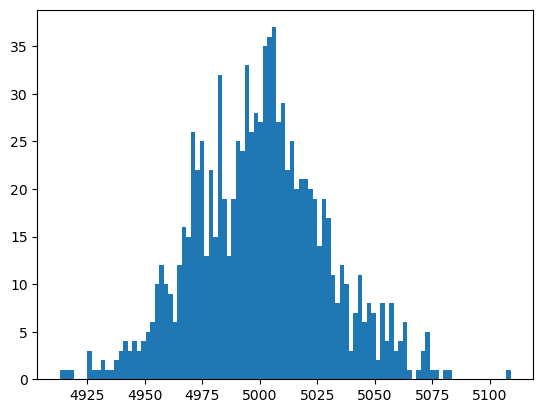

In [138]:
clm(1000,10000)

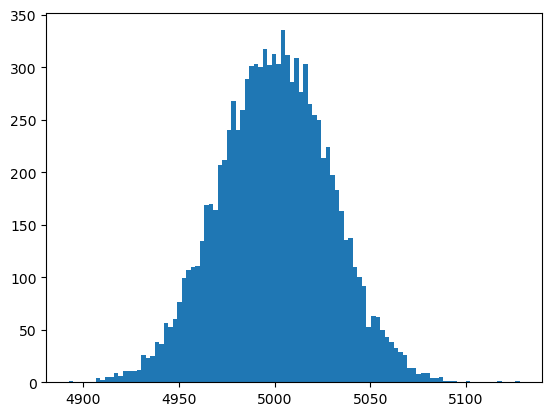

In [139]:
clm(10000,10000)